# Calculate CBED Thickness

<div class="alert alert-block alert-info"> Theory and python script to calculate foil thickness. Created by Liam Hughes. </div>



Generally, the thin foil thickness is measured using a
TEM- convergent beam electron diffraction (CBED)
method. Kossel-Möllenstedt (K-M) fringe under twobeam condition is used for the calculation of thin foil
thickness. The image below is a typical K-M fringe under the two-beam condition. Here the diffracted beam corresponds to the (110) spot.

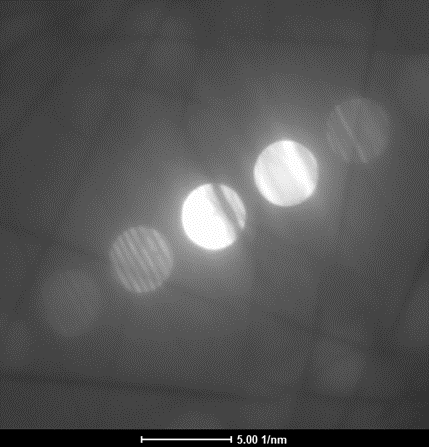

## Theory

Following the dynamical theory of diffraction contrast,
the amplitude of the diffracted wave ($\phi_g$) and the specimen thickness ($t$) have the following relationship (Willams and Carter 2009; Hirsch et al. 1977);

$$
\phi^2_g = \left(\frac{\pi}{\xi_g}\right)^2 \frac{\sin^2 \pi t s_{\text{eff}}}{\pi t s_{\text{eff}}} 
$$ 

where $\xi_g$ is the extinction distance of material and the
effective deviation vector $s_{\text{eff}}$ has the relation of $s_{\text{eff}} = \sqrt{\left( s^2 + \frac{1}{\xi^2_g} \right)}$.

The intensity minima in the K-M fringe of the diffracted hkl
CBED disk can be obtained when $\phi_g = 0$. On the other
hand, a deviation vector $s_i$ for $i^{\text{th}}$ fringe in a diffracted
disk has following relationship (Willams and Carter
2009; Hirsch et al. 1977);

$$s_i = \left( \frac{\lambda}{d^2_{hkl}} \right) \left( \frac{\Delta \theta_i}{2\theta_B} \right)$$

where $\lambda$ is a wavelength of the electron, $d_{hkl}$ is an interplanar distance of hkl plane, and $\theta_B$ is the Bragg angle
for hkl plane. Combining the two equations above and applying $\phi_g = 0$ condition ($t \times s_{\text{eff}} = n_i$, $n_i$ is an integer), we can
obtain the following equation;


$$
\frac{s^2_i}{n^2_i} = - \frac{1}{\xi^2_g} \cdot \frac{1}{n^2_i} + \frac{1}{t^2}.
$$

From this, we can obtain the specimen
thickness using the intercept value in a $\frac{s^2_i}{n^2_i}$ vs. $\frac{1}{n^2_i}$ plot.

## Code

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Input Values
a = 2.86652 # lattice parameter of Fe
g = [1,1,0] # g vector of diffraction disk
e = 200e3 # electron voltage

# Calculated Constants
d = (a/np.linalg.norm(g))**2 # lattice spacing (d)
w = (1.225)/math.sqrt(e) # wavelength of electrons in nm

# Input Data (nm)
double_bragg_angle = 0.203956761
data = [2.2471910, 1.1614401, 0.6631299, 0.4819277] # Measured with ImageJ (FIJI)
index = [2, 3, 4, 5] # n_i integers used to fit data

# Calculate From Equations (1) and (2)
s = ((w/d)*np.divide(data, double_bragg_angle))**2
n = 1/np.power(index,2)
s_div_n = s/n

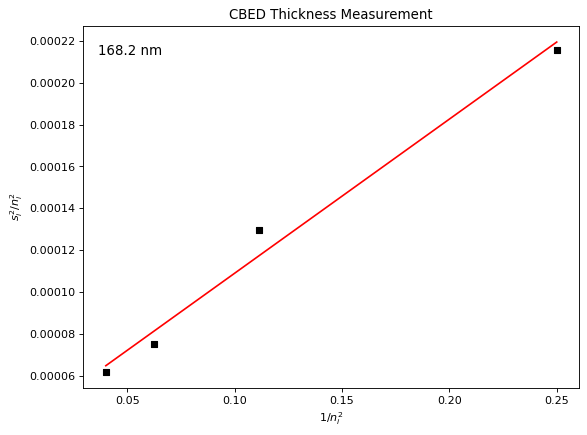

In [74]:
#define data
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
# x = np.array([0.25, 0.111111111, 0.0625, 0.04])
# y = np.array([0.000215976, 0.000129808, 7.52285E-05, 6.20824E-05])

x = n
y = s_div_n

#create scatterplot
plt.scatter(x, y, marker=',', color='black')
#plt.errorbar(x, y, yerr=error, fmt="o")

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),'-r')

#get thickness measurement
slope, intercept = np.polyfit(x, y, 1)
thickness = math.sqrt(1/(intercept))
plt.text(0.03, 0.92, str(np.round(thickness,1))+' nm', transform=ax.transAxes, fontsize=12)

plt.title("CBED Thickness Measurement");
plt.xlabel("$1/n_i^2$");
plt.ylabel("$s_i^2 / n_i^2$");

plt.savefig('C:/Users/peppe/Desktop/CBED_Thickness.pdf', transparent=False)
os.startfile("C:/Users/peppe/Desktop/CBED_Thickness.pdf")

# References 
Theory taken from: https://appmicro.springeropen.com/counter/pdf/10.1186/s42649-020-00029-4.pdf 